In [1]:
import numpy as np
import seaborn as sb

In [2]:
input_day09_test = ""
with open("input-day09-test") as f:
    input_day09_test = np.array([[int(y) for y in x] for x in f.read().strip().split("\n")])

input_day08 = ""
with open("input-day09") as f:
    input_day09 = np.array([[int(y) for y in x] for x in f.read().strip().split("\n")])

In [3]:
input_day09_test

array([[2, 1, 9, 9, 9, 4, 3, 2, 1, 0],
       [3, 9, 8, 7, 8, 9, 4, 9, 2, 1],
       [9, 8, 5, 6, 7, 8, 9, 8, 9, 2],
       [8, 7, 6, 7, 8, 9, 6, 7, 8, 9],
       [9, 8, 9, 9, 9, 6, 5, 6, 7, 8]])

<AxesSubplot:>

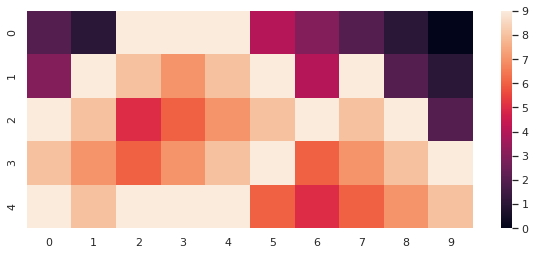

In [17]:
sb.set(rc = {'figure.figsize':(10,4)})
sb.heatmap(input_day09_test)

In [4]:
input_day09

array([[7, 6, 5, ..., 9, 8, 7],
       [9, 9, 8, ..., 9, 7, 6],
       [9, 8, 7, ..., 9, 6, 4],
       ...,
       [1, 0, 7, ..., 9, 1, 9],
       [2, 1, 8, ..., 1, 0, 1],
       [3, 2, 4, ..., 9, 2, 3]])

<AxesSubplot:>

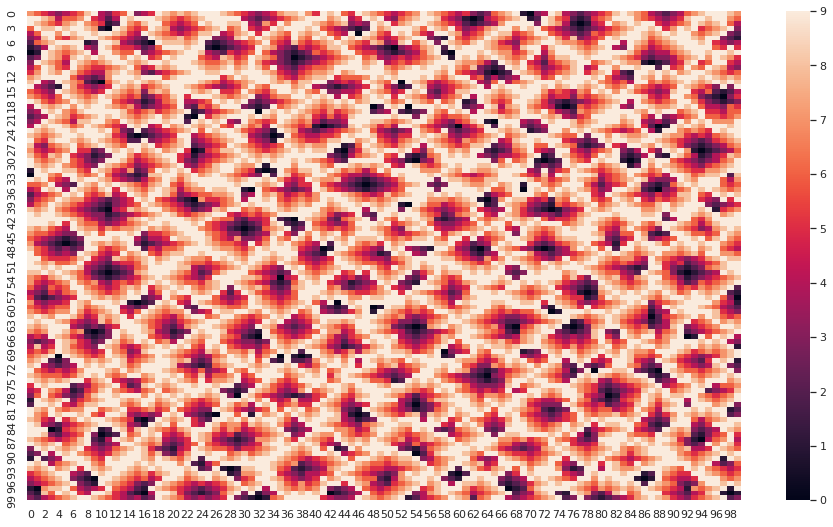

In [19]:
sb.set(rc = {'figure.figsize':(16,9)})
sb.heatmap(input_day09)

In [5]:
def solve_part1(input_data):
    low_points = []
    risk_level = []
    max_y = len(input_data) - 1
    max_x = len(input_data[0]) - 1
    for y, row in enumerate(input_data):
        for x, cell in enumerate(row):
            adjacents = []
            # left
            if 0 < x: adjacents.append(row[x-1])
            # right
            if x < max_x: adjacents.append(row[x+1])
            # top
            if 0 < y: adjacents.append(input_data[y-1][x])
            # down
            if y < max_y: adjacents.append(input_data[y+1][x])
            # check
            if cell < min(adjacents):
                low_points.append(cell)
                risk_level.append(cell+1)
    print("Low points:", low_points)
    print("Risk level:", risk_level)
    return sum(risk_level)

assert 15 == solve_part1(input_day09_test)

Low points: [1, 0, 5, 5]
Risk level: [2, 1, 6, 6]


In [6]:
print("Solution to part 1:", solve_part1(input_day09))

Low points: [3, 3, 5, 0, 2, 2, 3, 0, 0, 0, 3, 5, 0, 5, 1, 1, 1, 0, 3, 0, 0, 3, 0, 0, 0, 4, 2, 0, 5, 4, 3, 2, 0, 1, 0, 0, 1, 3, 1, 2, 3, 0, 1, 1, 0, 0, 4, 0, 3, 0, 2, 0, 4, 3, 0, 0, 0, 0, 2, 1, 4, 0, 0, 3, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 4, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 2, 0, 2, 1, 2, 0, 3, 3, 3, 1, 0, 1, 1, 0, 1, 0, 0, 4, 1, 1, 0, 2, 2, 0, 0, 1, 1, 5, 2, 2, 5, 0, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 2, 1, 1, 3, 0, 1, 0, 0, 0, 4, 2, 1, 1, 1, 0, 0, 5, 0, 1, 2, 1, 6, 4, 2, 0, 1, 0, 1, 0, 3, 1, 1, 5, 0, 1, 0, 0, 1, 0, 2, 2, 2, 0, 1, 1, 0, 4, 1, 1, 2, 0, 1, 2, 3, 4, 1, 1, 0, 1, 1, 4, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 2, 1]
Risk level: [4, 4, 6, 1, 3, 3, 4, 1, 1, 1, 4, 6, 1, 6, 2, 2, 2, 1, 4, 1, 1, 4, 1, 1, 1, 5, 3, 1, 6, 5, 4, 3, 1, 2, 1, 1, 2, 4, 2, 3, 4, 1, 2, 2, 1, 1, 5, 1, 4, 1, 3, 1, 5, 4, 1, 1, 1, 1, 3, 2, 5, 1, 1, 4, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 5, 3, 3, 1, 3, 3, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 2, 3, 1, 3, 2, 3, 1, 4, 4, 4, 2, 1,

In [63]:
class LowPoint:
    __slots__ = ['x', 'y', 'height', 'heightmap']
    
    def __repr__(self): return self.__str__()
    
    def __hash__(self):
        return hash((self.x, self.y, self.height, id(self.heightmap)))

    
    def __eq__(self, other):
        return isinstance(other, self.__class__) \
            and self.x == other.x \
            and self.y == other.y \
            and self.height == other.height \
            and self.heightmap == other.heightmap
    
    def __init__(self, x, y, height, heightmap):
        self.x = x
        self.y = y
        self.height = height
        self.heightmap = heightmap
        assert self.heightmap[self.y][self.x] == self.height
    
    def __str__(self):
        return "{} (x={},y={})".format(self.height, self.x, self.y)
    
    def basin(self):
        return self.get_basin(self.x, self.y)
    
    # attempt without recursion
    def get_basin(self, start_x, start_y):
        max_y = len(self.heightmap) - 1
        max_x = len(self.heightmap[0]) - 1
        result = set()
        processed = set()
        to_be_processed = set()
        to_be_processed.add((start_x, start_y))
        while to_be_processed:
            x, y = to_be_processed.pop()
            if (x, y) in result:
                continue
            result.add((x, y))
            if 0 < x:
                cell_x = x - 1
                cell_y = y
                cell = self.heightmap[cell_y][cell_x]
                if self.height <= cell < 9:
                    to_be_processed.add((cell_x, cell_y))
            # right
            if x < max_x: 
                cell_x = x + 1
                cell_y = y
                cell = self.heightmap[cell_y][cell_x]
                if self.height <= cell < 9:
                    to_be_processed.add((cell_x, cell_y))
            # top
            if 0 < y: 
                cell_x = x
                cell_y = y - 1
                cell = self.heightmap[cell_y][cell_x]
                if self.height <= cell < 9:
                    to_be_processed.add((cell_x, cell_y))
            # down
            if y < max_y: 
                cell_x = x
                cell_y = y + 1
                cell = self.heightmap[cell_y][cell_x]
                if self.height <= cell < 9:
                    to_be_processed.add((cell_x, cell_y))
                
        return sorted(result)
        
        
def solve_part2(input_data):
    # 1 - Find low points
    low_points = []
    max_y = len(input_data) - 1
    max_x = len(input_data[0]) - 1
    for y, row in enumerate(input_data):
        for x, cell in enumerate(row):
            adjacents = []
            # left
            if 0 < x: adjacents.append(row[x-1])
            # right
            if x < max_x: adjacents.append(row[x+1])
            # top
            if 0 < y: adjacents.append(input_data[y-1][x])
            # down
            if y < max_y: adjacents.append(input_data[y+1][x])
            # check
            if cell < min(adjacents):
                low_points.append(LowPoint(x=x, y=y, height=cell, heightmap=input_data))
    
    print("Low points:")
    print("\n".join([str(x) for x in low_points]))
    
    # 2 - Find the basins
    basins = []
    i = 0
    for lp in low_points:
        basin = lp.basin()
        basins.append(lp.basin())
    basin_sizes = sorted([len(x) for x in basins])
    print("Basin sizes", basin_sizes)
    print("Top-3 basin sizes", basin_sizes[-3:])
    return np.prod(basin_sizes[-3:])
    
assert solve_part2(input_day09_test) == 1134

Low points:
1 (x=1,y=0)
0 (x=9,y=0)
5 (x=2,y=2)
5 (x=6,y=4)
Basin sizes [3, 9, 9, 14]
Top-3 basin sizes [9, 9, 14]


In [64]:
print("Solution for part 2", solve_part2(input_day09))

Low points:
3 (x=4,y=0)
3 (x=15,y=0)
5 (x=40,y=0)
0 (x=70,y=0)
2 (x=89,y=0)
2 (x=32,y=1)
3 (x=51,y=1)
0 (x=62,y=1)
0 (x=77,y=2)
0 (x=11,y=3)
3 (x=21,y=3)
5 (x=94,y=3)
0 (x=46,y=4)
5 (x=5,y=5)
1 (x=58,y=5)
1 (x=99,y=5)
1 (x=8,y=6)
0 (x=17,y=6)
3 (x=68,y=6)
0 (x=26,y=7)
0 (x=51,y=7)
3 (x=83,y=7)
0 (x=0,y=8)
0 (x=59,y=8)
0 (x=37,y=9)
4 (x=5,y=10)
2 (x=72,y=10)
0 (x=87,y=10)
5 (x=94,y=10)
4 (x=78,y=11)
3 (x=99,y=11)
2 (x=17,y=12)
0 (x=65,y=12)
1 (x=84,y=12)
0 (x=10,y=14)
0 (x=52,y=14)
1 (x=4,y=15)
3 (x=27,y=15)
1 (x=43,y=15)
2 (x=57,y=16)
3 (x=88,y=16)
0 (x=97,y=17)
1 (x=16,y=18)
1 (x=61,y=18)
0 (x=48,y=19)
0 (x=53,y=19)
4 (x=66,y=19)
0 (x=75,y=19)
3 (x=84,y=19)
0 (x=32,y=20)
2 (x=0,y=21)
0 (x=23,y=21)
4 (x=6,y=22)
3 (x=29,y=22)
0 (x=65,y=22)
0 (x=41,y=23)
0 (x=60,y=23)
0 (x=88,y=23)
2 (x=51,y=24)
1 (x=70,y=24)
4 (x=83,y=24)
0 (x=15,y=25)
0 (x=34,y=25)
3 (x=2,y=27)
1 (x=78,y=27)
0 (x=23,y=28)
0 (x=44,y=28)
1 (x=65,y=28)
0 (x=94,y=28)
1 (x=9,y=29)
1 (x=89,y=29)
0 (x=54,y=30)
0 (x=72,y=30)
0